In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
METABO_PATH = '/net/mraid20/export/genie/LabData/Analyses/davidkro/batch_normalizations/'
DIET_PAPER_PATH = '/net/mraid20/export/genie/LabData/Analyses/Metabolomics_repeat/predict_MS/Optuna/Diet_paper'
tomer_dir = '/net/mraid20/export/genie/LabData/Analyses/tomerse/david_colab/'
output_data_dir = '/net/mraid20/export/genie/LabData/Analyses/Metabolomics_repeat/final_for_diet_paper'

In [124]:
ms_metadata = pd.read_csv(METABO_PATH + '/metadata_with_date.csv', index_col=0)
batch_info = pd.read_csv(METABO_PATH + '/batch_info/batches_order_info_1_36_ALL.csv', index_col=0)
serrf_all = pd.read_csv(DIET_PAPER_PATH + '/serrf_all.csv', index_col=0)
diet_features = pd.read_pickle(tomer_dir + 'diet_features.pkl').drop(columns=['age', 'gender'])
diet_features_v2 = pd.read_pickle(tomer_dir + 'diet_features_02_visit.pkl').drop(columns=['age', 'gender'])
nova_scores_baseline = pd.read_csv('/net/mraid20/export/genie/LabData/Data/10K/foods/upf_baseline.csv')
nova_score_visit2 = pd.read_csv('/net/mraid20/export/genie/LabData/Data/10K/foods/upf_2y.csv')

In [125]:
# Rename 1, 2, 3, 4 columns into Group 1, Group 2, Group 3, Group 4
nova_scores_baseline.rename(columns={'1': 'Group 1', '2': 'Group 2', '3': 'Group 3', '4': 'Group 4', 'NOVA Score': 'Combined_score'}, inplace=True)
nova_score_visit2.rename(columns={'1': 'Group 1', '2': 'Group 2', '3': 'Group 3', '4': 'Group 4', 'NOVA Score': 'Combined_score'}, inplace=True)

In [126]:
# drop columns with nans
nova_scores_baseline.dropna(inplace=True)
nova_score_visit2.dropna(inplace=True)

In [127]:
nova_scores_baseline['research_stage'] = 'baseline'
nova_score_visit2['research_stage'] = '02_00_visit'
all_nova_scores = pd.concat([nova_scores_baseline, nova_score_visit2])

In [128]:
# create a columns combining Group 1, and Group 2
all_nova_scores['Group 1+2'] = all_nova_scores['Group 1'] + all_nova_scores['Group 2']

In [129]:
# minmax scale nova scores
scaler = MinMaxScaler()
all_nova_scores[['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Combined_score', 'Group 1+2']] = scaler.fit_transform(all_nova_scores[['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Combined_score', 'Group 1+2']])

In [130]:
diet_features_ag = pd.read_pickle(tomer_dir + 'diet_features.pkl')

In [131]:
serrf_all.shape

(11023, 2252)

In [132]:
serrf_all = serrf_all.join(batch_info[['batch']], how='inner')

In [133]:
serrf_all.shape

(11023, 2253)

In [105]:
def plot_research_stage_counts(df):
    """
    Plot the count of research_stage values for each batch
    
    Parameters:
    df (DataFrame): DataFrame with 'batch' and 'research_stage' columns
    """
    
    # Create a cross-tabulation to count occurrences
    count_table = pd.crosstab(df['batch'], df['research_stage'])
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create a stacked bar chart
    count_table.plot(kind='bar', stacked=True, ax=ax)
    
    # Customize the plot
    plt.title('Research Stage Counts by Batch', fontsize=16, fontweight='bold')
    plt.xlabel('Batch', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Research Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.savefig(DIET_PAPER_PATH + '/research_stage_counts_by_batch.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return count_table

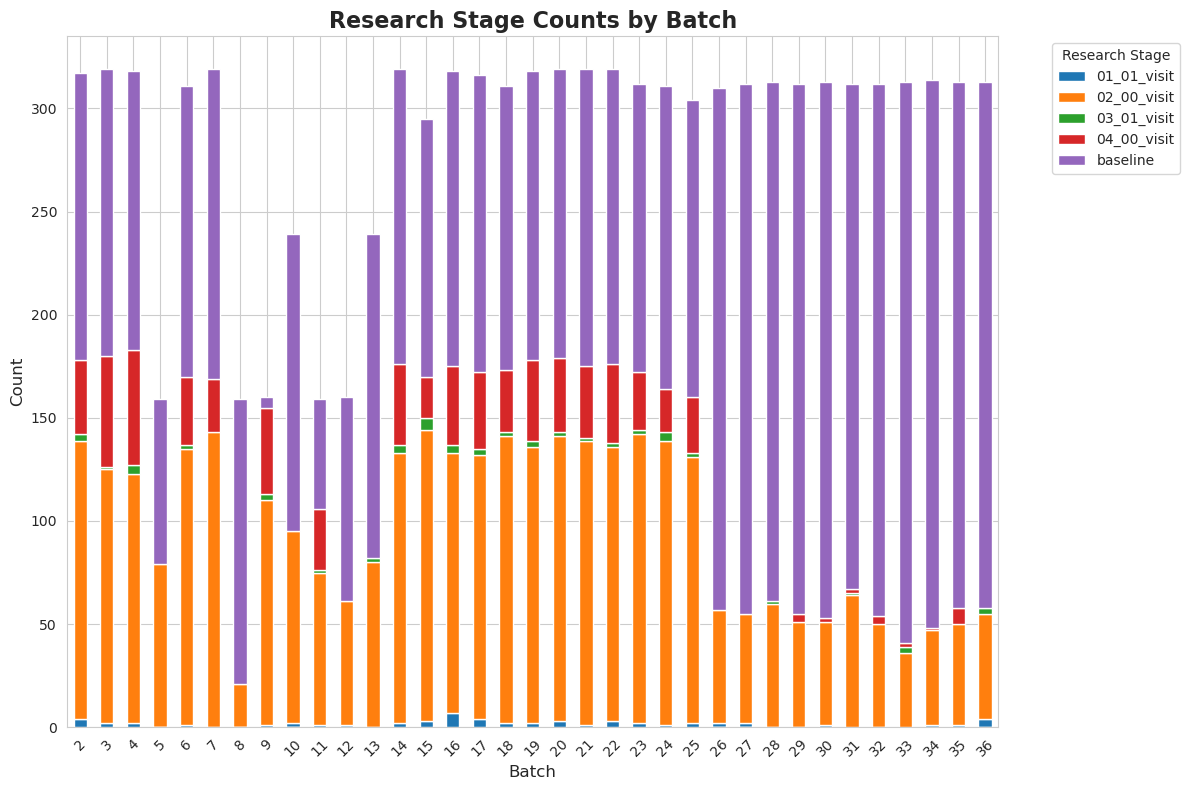

research_stage,01_01_visit,02_00_visit,03_01_visit,04_00_visit,baseline
batch,,,,,
2,4,135,3,36,139
3,2,123,1,54,139
4,2,121,4,56,135
5,0,79,0,0,80
6,1,134,2,33,141
7,0,143,0,26,150
8,0,21,0,0,138
9,1,109,3,42,5
10,2,93,0,0,144


In [106]:
# Plot the research stage counts
plot_research_stage_counts(serrf_all)

In [135]:
serrf_all_diet = serrf_all.reset_index().merge(diet_features, on='RegistrationCode', how='left')

In [136]:
serrf_all_diet = serrf_all_diet.merge(all_nova_scores,on=['RegistrationCode', 'research_stage'], how='left')

In [137]:
serrf_all_diet['Group 1'].isna().sum()

2567

In [138]:
serrf_all_diet['RegistrationCode'].isna().sum()

965

In [139]:
# serrf_all_diet.to_csv(DIET_PAPER_PATH + '/serrf_all_diet.csv')

In [140]:
# Create boolean masks for our conditions
both_missing = serrf_all_diet[['RegistrationCode', 'med_score_per_day']].isna().all(axis=1)
reg_present_med_missing = (~serrf_all_diet['RegistrationCode'].isna()) & (serrf_all_diet['med_score_per_day'].isna())

# Keep rows where:
# 1. Both values are missing OR
# 2. Not in the condition where RegistrationCode exists but med_score_per_day is missing
mask = both_missing | ~reg_present_med_missing

# Apply the mask and return the filtered DataFrame
serrf_all_diet_clean =  serrf_all_diet[mask].copy()

In [141]:
serrf_all_diet_clean.drop(columns=['age', 'gender', 'bmi', 'research_stage'], inplace=True)

In [142]:
serrf_all_diet_clean.set_index('index', inplace=True)

In [143]:
"""
atopic dermatitis batch 5
BC batches 8-10
PDAC batches 11-13
"""
# create sepretate dataframes for each group
ad_batch = serrf_all_diet_clean[serrf_all_diet_clean['batch'] == 5]
bc_batch = serrf_all_diet_clean[serrf_all_diet_clean['batch'].isin([8, 9, 10])]
pdac_batch = serrf_all_diet_clean[serrf_all_diet_clean['batch'].isin([11, 12, 13])]
healthy_batch = serrf_all_diet_clean[~serrf_all_diet_clean['batch'].isin([5, 8, 9, 10, 11, 12, 13])]

In [144]:
ad_batch.shape

(317, 2969)

In [145]:
# load atopic metadata
atopic_metadata = pd.read_excel('/net/mraid20/ifs/wisdom/segal_lab/jafar/Microbiome/Analyses/saar/atopic/AD_FMT2/data_frames/metadata.xlsx')

In [146]:
def first_non_null(series):
    non_null = series.dropna()
    if len(non_null) > 0:
        return non_null.iloc[0]
    else:
        return np.nan

In [147]:
atopic_metadata_baseline = atopic_metadata.groupby('RegistrationCode').agg(
    # For metabolomics column, get first non-null value
    metabolomics=('metabolomics', first_non_null),
).reset_index()

In [148]:
atopic_metadata_baseline_indexes = atopic_metadata_baseline['metabolomics']

In [149]:
# Assuming atopic_metadata_baseline_indexes is a Series or array-like of boolean values or indices
ad_batch_filtered = ad_batch[
    ~ad_batch['RegistrationCode'].isna() | 
    ad_batch.index.isin(atopic_metadata_baseline_indexes)
].copy()

In [150]:
ad_batch_filtered.columns

Index(['1.81_904.4772n_290.2', '1.95_1076.5247n_352.29',
       '2.04_558.1404n_207.0', '1.88_1090.4203n_344.04',
       '1.66_334.0144n_180.66', '2.14_630.1615n_222.67',
       '2.13_602.0943n_294.0', '2.21_1106.4885n_353.01',
       '2.24_863.4035n_279.77', '2.35_856.3247n_269.15',
       ...
       'sweetmilkproducts', 'sweets', 'NOVA Score', 'Energy / BMR', 'Group 1',
       'Group 2', 'Group 3', 'Group 4', 'Combined_score', 'Group 1+2'],
      dtype='object', length=2969)

In [151]:
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import os
from datetime import datetime
import shap
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

def predict_diet_features(healthy_df, mixed_dfs_dict, metabolite_columns, diet_columns, 
                         output_path, scale_features=True, run_suffix=''):
    """
    Train models on healthy subjects' data and predict diet features for subjects with missing data.
    
    Parameters:
    -----------
    healthy_df : pandas DataFrame
        DataFrame containing healthy subjects with complete metabolite and diet data
    mixed_dfs_dict : dict
        Dictionary of DataFrames containing both healthy and sick subjects, where only healthy have diet data
        Format: {'batch_name': dataframe}
    metabolite_columns : list
        List of metabolite column names to use as features
    diet_columns : list
        List of diet feature column names to predict
    output_path : str
        Path where results will be saved
    scale_features : bool, default=True
        Whether to scale features using StandardScaler
    run_suffix : str, default=''
        Optional suffix to add to the run directory name
    
    Returns:
    --------
    dict
        Dictionary containing predictions and validation results for each batch
    """
    results = {}
    
    # Create output directory
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    base_output_path = os.path.join(output_path, f'diet_predictions_{timestamp}{run_suffix}')
    os.makedirs(base_output_path, exist_ok=True)
    
    
    # Initialize run metrics dictionary
    run_metrics = {
        'timestamp': timestamp,
        'n_features': len(metabolite_columns),
        'scaled_features': scale_features
    }
    
    # Prepare training data from healthy subjects
    X_train = healthy_df[metabolite_columns].copy()
    
    if scale_features:
        scaler = StandardScaler()
        X_train = pd.DataFrame(
            scaler.fit_transform(X_train),
            columns=metabolite_columns,
            index=X_train.index
        )
    
    # Model parameters
    params = {
        'metric': 'r2',
        'num_leaves': 31,
        'learning_rate': 0.03,
        'feature_fraction': 0.75,
        'bagging_fraction': 0.7,
        'bagging_freq': 1,
        'n_estimators': 2000,
        'verbose': -1,
        'num_threads': 30
    }
    
    # Process each mixed dataset
    for batch_name, mixed_df in mixed_dfs_dict.items():
        batch_dir = os.path.join(base_output_path, batch_name)
        os.makedirs(batch_dir, exist_ok=True)
        
        # Identify healthy subjects in the mixed dataset for validation
        healthy_mask = ~mixed_df[diet_columns].isna().all(axis=1)
        validation_df = mixed_df[healthy_mask]
        
        # Prepare features for prediction
        X_pred = mixed_df[metabolite_columns].copy()
        if scale_features:
            X_pred = pd.DataFrame(
                scaler.transform(X_pred),
                columns=metabolite_columns,
                index=X_pred.index
            )
        
        batch_results = {
            'predictions': pd.DataFrame(index=mixed_df.index),
            'validation_metrics': {}
        }
        
        # Train model and predict for each diet feature
        for target in tqdm(diet_columns, desc=f"Processing {batch_name}"):
            target_dir = os.path.join(batch_dir, target)
            os.makedirs(target_dir, exist_ok=True)
            
            # Train on healthy subjects
            y_train = healthy_df[target].values
            train_data = lgb.Dataset(X_train, label=y_train)
            
            # drop rows with missing values in target column
            train_data = train_data.subset(np.where(~np.isnan(y_train))[0])
            
            # Train model
            model = lgb.train(
                params,
                train_data,
                num_boost_round=params['n_estimators']
            )
            
            # Make predictions for all subjects
            predictions = model.predict(X_pred)
            batch_results['predictions'][target] = predictions
            
            # Skip saving per-target predictions as we'll save them all together at the batch level
            
            # Validate on healthy subjects in the mixed dataset
            if len(validation_df) > 0:
                y_val = validation_df[target].values
                y_val_pred = predictions[healthy_mask]
                
                val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
                val_r2 = r2_score(y_val, y_val_pred)
                
                batch_results['validation_metrics'][target] = {
                    'rmse': val_rmse,
                    'r2': val_r2
                }
                
                # Save validation results
                val_results_df = pd.DataFrame({
                    'true_values': y_val,
                    'predictions': y_val_pred
                }, index=validation_df.index)
                val_results_df.to_csv(os.path.join(target_dir, 'validation_results.csv'))
                
                # SHAP Analysis for validation set
                X_val = X_pred.loc[validation_df.index]
                explainer = shap.TreeExplainer(model)
                shap_values = explainer.shap_values(X_val)
                
                # Save SHAP plot
                plt.figure(figsize=(12, 8))
                shap.summary_plot(shap_values, X_val, show=False)
                plt.title(f'SHAP Summary Plot for {target} - {batch_name}')
                plt.tight_layout()
                plt.savefig(os.path.join(target_dir, 'shap_summary.png'), dpi=300, bbox_inches='tight')
                plt.close()
            
            # Save model
            model.save_model(os.path.join(target_dir, 'model.txt'))
        
        # Save all predictions for this specific mixed DataFrame
        predictions_df = batch_results['predictions'].copy()
        
        # Add true values where available
        for col in diet_columns:
            if col in mixed_df.columns:
                predictions_df[f'{col}_true'] = mixed_df[col]
        
        # Save full prediction results for this batch
        predictions_df.to_csv(os.path.join(batch_dir, 'full_predictions.csv'))
        
        # Original batch predictions (keeping for compatibility)
        batch_results['predictions'].to_csv(os.path.join(batch_dir, 'predictions.csv'))
        
        # Save validation metrics
        if batch_results['validation_metrics']:
            metrics_df = pd.DataFrame.from_dict(batch_results['validation_metrics'], orient='index')
            metrics_df.to_csv(os.path.join(batch_dir, 'validation_metrics.csv'))
        
        results[batch_name] = batch_results
        
        # Update run metrics
        for target, metrics in batch_results['validation_metrics'].items():
            run_metrics[f'{batch_name}_{target}_rmse'] = metrics['rmse']
            run_metrics[f'{batch_name}_{target}_r2'] = metrics['r2']
    
    # Save overall run metrics
    pd.DataFrame([run_metrics]).to_csv(os.path.join(base_output_path, 'run_metrics.csv'), index=False)
    
    return results

In [152]:
# Define columns for metabolites and diet features

# Metabolite columns all contain 'm/z'
metabolite_columns = [col for col in serrf_all_diet_clean.columns if '.' in col]
diet_scores = ['med_score_per_day', 'paleo_score_per_day', 'vegetarian_score_per_day', 'wfpb_score_per_day', 'vegan_score_per_day', 'carnivore_score_per_day']
pct_macros = ['pct_protein_calories', 'pct_fat_calories', 'pct_carb_calories', 'pct_saturated_fat_calories', 'Fiber, total dietary']
lipids_ratios = ['sat_to_total_lipids_ratio', 'trans_to_total_lipids_ratio', 'mono_to_total_lipids_ratio', 'poly_to_total_lipids_ratio', 'omega3_to_total_lipids_ratio', 'omega6_to_total_lipids_ratio']
plant_ratios = ['plant_energy_pct', 'plant_protein_pct', 'plant_fat_pct']
food_categories = [ 'AlcoholicDrinks',
 'Beefveallambandothermeatproducts',
 'Bread_cat',
 'Bread_wholewheat',
 'Cannedvegandfruits',
 'Cereals_cat',
 'Deepfriedfoods',
 'Drinks',
 'Eggsandtheirproducts',
 'FastFoods',
 'Fishandseafood',
 'Fruits',
 'Hardcheese',
 'Industrializedvegetarianfoodreadytoeat',
 'MedOilandfats',
 'Nutsseedsandproducts',
 'Oilsandfats',
 'Others',
 'PastaGrainsandSidedishes',
 'PastaGrainsandSidedishes_wholewheat',
 'Poultryanditsproducts',
 'Proccessedmeatproducts',
 'Pulsesandproducts',
 'Snacks',
 'Soupsandsauces',
 'Spicesandherbs',
 'Vegetables',
 'bakedgoods',
 'fruitjuicesandsoftdrinks',
 'milkcreamcheeseandyogurts',
 'sweetmilkproducts',
 'sweets']
nutrients = ['Fiber, total dietary',
 'Calcium, Ca',
 'Iron, Fe',
 'Magnesium, Mg',
 'Phosphorus, P',
 'Potassium, K',
 'Sodium, Na',
 'Zinc, Zn',
 'Copper, Cu',
 'Vitamin C, total ascorbic acid',
 'Thiamin',
 'Riboflavin',
 'Niacin',
 'Vitamin B-6',
 'Folate, total',
 'Vitamin B-12',
 'Cholesterol',
 'Fatty acids, total saturated',
 'Fatty acids, total monounsaturated',
 'Fatty acids, total polyunsaturated',
 'Vitamin D (D2 + D3)',
 'Sugars, Total',
 'Fatty acids, total trans',
 'Vitamin A, RAE',
 'Isoleucine',
 'Leucine',
 'Valine',
 'Lysine',
 'Threonine',
 'Methionine',
 'Phenylalanine',
 'Tryptophan',
 'Histidine',
 'Tyrosine',
 'Arginine',
 'Cystine',
 'Serine',
 'Pantothenic acid',
 'Selenium, Se',
 'Choline, total',
 'Manganese, Mn',
 'Fructose',
 'Vitamin K',
 'Iodine',
 'Sugar alcohols',
 'Biotin',
 'Alanine',
 'Ash',
 'Aspartic acid',
 'Betaine',
 'Caffeine',
 'Campesterol',
 'Fluoride, F',
 'Glucose',
 'Glutamic acid',
 'Glycine',
 'Hydroxyproline',
 'Lutein + zeaxanthin',
 'Lycopene',
 'Phytosterols',
 'Proline',
 'Starch',
 'omega_6',
 'omega_3',
 'vitamin_E',
 # 'Protein',
 # 'Total lipid (fat)',
 # 'Carbohydrate, by difference',
 'Energy',
 # 'Alcohol, ethyl',
 'Water']
nova_scores_cols = ['Group 1', 'Group 3', 'Group 4']

In [153]:
ad_batch_filtered.sweets.isna().sum()

25

In [154]:
# Run prediction for each batch
cols_type = nova_scores_cols
output_path = DIET_PAPER_PATH + '/External_use_case/NOVA_final_for_paper'
# Example usage
mixed_dfs = {
    'breast_cancer_cohort': bc_batch,
    'atopic_cohort': ad_batch_filtered,
    'pdac_cohort': pdac_batch
}

In [155]:
results = predict_diet_features(healthy_batch, mixed_dfs, metabolite_columns, cols_type, output_path)

Processing breast_cancer_cohort:   0%|          | 0/3 [00:00<?, ?it/s]

/net/mraid20/export/jasmine/david/anaconda3/envs/freshEnv/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/net/mraid20/export/jasmine/david/anaconda3/envs/freshEnv/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/net/mraid20/export/jasmine/david/anaconda3/envs/freshEnv/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Processing atopic_cohort:   0%|          | 0/3 [00:00<?, ?it/s]

/net/mraid20/export/jasmine/david/anaconda3/envs/freshEnv/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/net/mraid20/export/jasmine/david/anaconda3/envs/freshEnv/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/net/mraid20/export/jasmine/david/anaconda3/envs/freshEnv/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Processing pdac_cohort:   0%|          | 0/3 [00:00<?, ?it/s]

/net/mraid20/export/jasmine/david/anaconda3/envs/freshEnv/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/net/mraid20/export/jasmine/david/anaconda3/envs/freshEnv/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/net/mraid20/export/jasmine/david/anaconda3/envs/freshEnv/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [ ]:
# Run prediction for each batch
cols_type = plant_ratios
output_path = DIET_PAPER_PATH + '/External_use_case/Plant_ratios'
results = predict_diet_features(healthy_batch, mixed_dfs, metabolite_columns, cols_type, output_path)

In [ ]:
# Run prediction for each batch
cols_type = food_categories
output_path = DIET_PAPER_PATH + '/External_use_case/Food_categories'
results = predict_diet_features(healthy_batch, mixed_dfs, metabolite_columns, cols_type, output_path)

In [ ]:
# Run prediction for each batch
cols_type = nutrients
output_path = DIET_PAPER_PATH + '/External_use_case/Nutrients'
results = predict_diet_features(healthy_batch, mixed_dfs, metabolite_columns, cols_type, output_path)

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multitest import multipletests
import os
from tqdm.notebook import tqdm

def compare_predicted_features(predictions_dir, cohort_dfs_dict, diet_columns, output_dir, figsize=(15, 8), plot_types=['box', 'violin']):
    """
    Create combined plots for predicted features and perform statistical comparison.
    
    Parameters:
    -----------
    predictions_dir : str
        Directory containing prediction results for different cohorts
    cohort_dfs_dict : dict
        Dictionary with cohort names as keys and original DataFrames as values.
        Non-NaN diet features indicate healthy subjects
    diet_columns : list
        List of diet feature columns used to identify healthy subjects
    output_dir : str
        Directory to save the plots and statistical results
    figsize : tuple, default=(15, 8)
        Figure size for the plots
    plot_types : list, default=['box', 'violin']
        Types of plots to generate ('box' and/or 'violin')
    
    Returns:
    --------
    dict
        Dictionary containing statistical results for each cohort
    """
    os.makedirs(output_dir, exist_ok=True)
    results = {}
    
    # Process each cohort
    for cohort_name, cohort_df in cohort_dfs_dict.items():
        print(f"\nProcessing {cohort_name}...")
        cohort_dir = os.path.join(output_dir, cohort_name)
        os.makedirs(cohort_dir, exist_ok=True)
        
        # Load predictions
        pred_file = os.path.join(predictions_dir, cohort_name, 'predictions.csv')
        if not os.path.exists(pred_file):
            print(f"No predictions found for {cohort_name}, skipping...")
            continue
            
        predictions = pd.read_csv(pred_file, index_col=0)
        
        # Identify healthy subjects (those with non-NaN diet features)
        healthy_mask = ~cohort_df[diet_columns].isna().all(axis=1)
        
        # Prepare data for plotting
        plot_data = []
        for feature in predictions.columns:
            healthy_values = predictions[healthy_mask][feature]
            disease_values = predictions[~healthy_mask][feature]
            
            plot_data.extend([
                pd.DataFrame({
                    'Feature': feature,
                    'Group': 'Healthy',
                    'Value': healthy_values
                }),
                pd.DataFrame({
                    'Feature': feature,
                    'Group': 'Disease',
                    'Value': disease_values
                })
            ])
        
        plot_df = pd.concat(plot_data, ignore_index=True)
        
        stat_results = []
        features = predictions.columns

        for feature in features:
            control_data  = predictions[healthy_mask][feature]
            disease_data  = predictions[~healthy_mask][feature]
        
            # Mann-Whitney U (same as before)
            statistic, pvalue = stats.mannwhitneyu(control_data, disease_data,
                                                   alternative='two-sided')
        
            # t-test (same as before)
            statistic_t_test, pvalue_t_test = stats.ttest_ind(control_data,
                                                              disease_data,
                                                              equal_var=True)
        
            # >>> NEW <<< median-based percent change
            control_median  = control_data.median()
            disease_median  = disease_data.median()
            percent_change  = (disease_median - control_median) / control_median * 100
        
            # rank-biserial correlation (same as before)
            effect_size = 2 * statistic / (len(control_data) * len(disease_data)) - 1
        
            stat_results.append({
                'Feature'          : feature,
                'Statistic'        : statistic,
                'P_value'          : pvalue,
                'Effect_size'      : effect_size,
                'Statistic_t_test' : statistic_t_test,
                'P_value_t_test'   : pvalue_t_test,
                'Control_mean'     : control_data.mean(),
                'Disease_mean'     : disease_data.mean(),
                'Control_median'   : control_median,         # keep for reference
                'Disease_median'   : disease_median,         #  "
                'Percent_change'   : percent_change,
                'Control_size'     : len(control_data),
                'Disease_size'     : len(disease_data)
            })
        
        # Create DataFrame and apply FDR correction
        stat_df = pd.DataFrame(stat_results)
        _, adjusted_pvals, _, _ = multipletests(
            stat_df['P_value'], 
            method='fdr_bh'
        )
        stat_df['FDR_adjusted_P'] = adjusted_pvals
        
        # Save statistical results
        stat_df.to_csv(os.path.join(cohort_dir, 'statistical_comparison.csv'), index=False)
        results[cohort_name] = stat_df
        
        # Generate plots based on plot_types parameter
        if 'box' in plot_types:
            create_boxplot(plot_df, stat_df, features, cohort_name, cohort_dir, figsize)
        
        if 'violin' in plot_types:
            create_violinplot(plot_df, stat_df, features, cohort_name, cohort_dir, figsize)
        
        # Create summary of significant findings
        summary_df = stat_df[stat_df['FDR_adjusted_P'] < 0.1].copy()
        summary_df['Significance'] = summary_df['FDR_adjusted_P'].apply(
            lambda x: '***' if x < 0.001 else ('**' if x < 0.01 else '*')
        )
        summary_df = summary_df.sort_values('FDR_adjusted_P')
        
        with open(os.path.join(cohort_dir, 'significant_findings.txt'), 'w') as f:
            f.write(f"Significant differences in {cohort_name}:\n")
            f.write(f"Total subjects: {len(predictions)}\n")
            f.write(f"Healthy subjects: {sum(healthy_mask)}\n")
            f.write(f"Disease subjects: {sum(~healthy_mask)}\n\n")
            
            if len(summary_df) == 0:
                f.write("No significant differences found after FDR correction.\n")
            else:
                for _, row in summary_df.iterrows():
                    f.write(f"{row['Feature']}:\n")
                    f.write(f"  Percent change: {row['Percent_change']:.1f}%\n")
                    f.write(f"  FDR-adjusted p-value: {row['FDR_adjusted_P']:.3e} {row['Significance']}\n")
                    f.write(f"  Effect size: {row['Effect_size']:.3f}\n")
                    f.write(f"  Means: Healthy={row['Control_mean']:.3f}, Disease={row['Disease_mean']:.3f}\n\n")
    
    return results

def create_boxplot(plot_df, stat_df, features, cohort_name, cohort_dir, figsize=(3, 2)):
    """
    Create box and swarm plots and save to file.
    """
    # First, rename "Disease" to "Atypic" in the dataframe
    plot_df = plot_df.copy()
    plot_df['Group'] = plot_df['Group'].replace('Disease', 'AD')
    plot_df['Group'] = plot_df['Group'].replace('Healthy', 'HC')
    
    plt.figure(figsize=figsize)
    
    sns.set_style('whitegrid')
    
    # Define colors explicitly to ensure consistency
    palette = {'HC': '#1f77b4', 'AD': '#ff7f0e'}  # Blue for Healthy, Orange for Atypic
    
    # Create box plot with a narrower width but hide from legend
    ax = sns.boxplot(data=plot_df, x='Feature', y='Value', hue='Group',
               showfliers=False, width=0.4, fill=False, legend=False, 
               palette=palette)
    
    # Make the box plot more transparent
    import matplotlib as mpl
    for patch in ax.artists:
        fc = patch.get_facecolor()
        patch.set_facecolor(mpl.colors.to_rgba(fc, 0.3))
    
    # Add stripplot with fixed jitter but also hide from legend
    sns.stripplot(data=plot_df, x='Feature', y='Value', hue='Group',
                 size=3, alpha=0.6, dodge=0.5, jitter=0.1, legend=False,
                 palette=palette)  # Use same palette here
    
    # Add statistical annotations
    add_stat_annotations(ax, plot_df, stat_df, features)
    
    plt.xlabel('')
    plt.ylabel('Predicted Value (%)')
    plt.xticks(rotation=45, ha='right')
    
    # Create a custom legend with colors matching the plot
    from matplotlib.lines import Line2D
    
    # Create custom legend elements with explicit colors
    custom_lines = [
        Line2D([0], [0], color=palette['HC'], marker='o', linestyle='None', 
               markersize=6, label='HC'),
        Line2D([0], [0], color=palette['AD'], marker='o', linestyle='None', 
               markersize=6, label='AD')
    ]
    
    # Add the custom legend
    ax.legend(handles=custom_lines, loc='best')
    
    # change the x axis ticks to be MPF, PF, UPF
    ax.set_xticklabels(['MPF', 'PF', 'UPF'], rotation=45, ha='right')
    
    # Remove the grid
    ax.grid(False)
    
    # Remove borders
    sns.despine()
    
    # Adjust layout and save
    plt.tight_layout()
    plt.savefig(os.path.join(cohort_dir, 'feature_comparisons_boxplot.png'), 
                dpi=300, bbox_inches='tight')
    # also save pdf
    plt.savefig(os.path.join(cohort_dir, 'feature_comparisons_boxplot.pdf'), 
                dpi=300, bbox_inches='tight')
    plt.close()
    
    
def create_violinplot(plot_df, stat_df, features, cohort_name, cohort_dir, figsize=(15, 8)):
    """
    Create violin and swarm plots and save to file.
    """
    plt.figure(figsize=figsize)
    
    sns.set_style('whitegrid')
    
    # Create split violin plot with updated parameter
    ax = sns.violinplot(data=plot_df, x='Feature', y='Value', hue='Group',
                  density_norm='width', width=0.7, inner="quart", cut=0,
                  palette='pastel', alpha=1, split=True, gap=0.07)
    
    
    # Add statistical annotations
    add_stat_annotations(ax, plot_df, stat_df, features)
    
    plt.title(f'Predicted Feature Comparison (Violinplot) - {cohort_name}')
    plt.xlabel('')
    plt.ylabel('Predicted Value')
    plt.xticks(rotation=45, ha='right')
    
    # add a constant to y limit to avoid cutting off the violin plot
    y_min, y_max = plt.ylim()
    plt.ylim(y_min, y_max + 0.1 * (y_max - y_min))
    
    # Fix the legend (avoid duplicate entries)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[:2], labels[:2], title='Group')
    
    # Adjust layout and save
    plt.tight_layout()
    plt.savefig(os.path.join(cohort_dir, 'feature_comparisons_violinplot.png'), 
                dpi=300, bbox_inches='tight')
    plt.close()

def add_stat_annotations(ax, plot_df, stat_df, features):
    """
    Add significance stars and median-based percent change annotations.
    Positive changes are prefixed with ?+?.
    """
    for idx, feature in enumerate(features):
        row = stat_df.loc[stat_df['Feature'] == feature].iloc[0]

        # Significance stars
        if   row['FDR_adjusted_P'] < 0.001: p_text = '***'
        elif row['FDR_adjusted_P'] < 0.01:  p_text = '**'
        elif row['FDR_adjusted_P'] < 0.1:   p_text = '*'
        else:                               p_text = 'ns'

        # Median % change with explicit sign
        pct = row['Percent_change']
        # pct_text = f'{pct:+.1f}%'

        # annotation = f'{p_text}\n{pct_text}'
        annotation = f'{p_text}'

        # Position annotation just above the current feature?s max
        y_vals = plot_df.loc[plot_df['Feature'] == feature, 'Value']
        y_pos  = y_vals.max() + (y_vals.max() - y_vals.min()) * 0.05

        ax.text(idx, y_pos, annotation,
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')  # emphasise the difference

In [222]:
output_path = DIET_PAPER_PATH + '/External_use_case/NOVA_final_for_paper'
results = compare_predicted_features(
    predictions_dir=os.path.join(output_path, 'diet_predictions_20250710_125448'),
    cohort_dfs_dict=mixed_dfs,
    diet_columns=nova_scores_cols,
    output_dir=output_path,
    figsize=(5, 5),
    plot_types=['box', 'violin'])


Processing breast_cancer_cohort...


/tmp/ipykernel_44827/703172370.py:214: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['MPF', 'PF', 'UPF'], rotation=45, ha='right')



Processing atopic_cohort...


/tmp/ipykernel_44827/703172370.py:214: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['MPF', 'PF', 'UPF'], rotation=45, ha='right')



Processing pdac_cohort...


/tmp/ipykernel_44827/703172370.py:214: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['MPF', 'PF', 'UPF'], rotation=45, ha='right')


### Metaboloc Age Analysis

In [442]:
def analyze_age_predictions(csv_path):
    """
    Analyze age predictions data:
    1. Group participants into 2-year age bins based on true age values
    2. Identify indices for top 10% and bottom 10% of predicted ages within each bin
    3. Aggregate all top 10% and bottom 10% across all bins
    
    Args:
        csv_path (str): Path to the CSV file
        
    Returns:
        tuple: (age_bins_dict, top_10_percent_by_bin, bottom_10_percent_by_bin, 
                aggregated_top_10_percent, aggregated_bottom_10_percent)
    """
    # Read the CSV file
    df = pd.read_csv(csv_path)
    
    # 1. Create 2-year age bins based on true_values
    # Create bins starting from 40 (known min) to 70 (known max) with 2-year intervals
    min_age = 40
    max_age = 70
    
    # Initialize dictionaries to store results
    age_bins_dict = {}  # Store all indices in each bin
    top_10_percent_by_bin = {}  # Store top 10% indices in each bin
    bottom_10_percent_by_bin = {}  # Store bottom 10% indices in each bin
    aggregated_top_10_percent = []  # Store all top 10% indices
    aggregated_bottom_10_percent = []  # Store all bottom 10% indices
    
    # Create bin labels
    bin_labels = []
    for bin_start in range(min_age, max_age, 2):
        bin_name = f"{bin_start}-{bin_start+1}"
        bin_labels.append(bin_name)
        age_bins_dict[bin_name] = []
        top_10_percent_by_bin[bin_name] = []
        bottom_10_percent_by_bin[bin_name] = []
    
    # Manually assign each row to its appropriate bin
    for index, row in df.iterrows():
        age = row['true_values']
        bin_start = int(np.floor(age / 2) * 2)
        bin_name = f"{bin_start}-{bin_start+1}"
        
        if bin_name in age_bins_dict:
            age_bins_dict[bin_name].append(row['index'])
    
    # Process each bin to find top and bottom 10%
    for bin_name in bin_labels:
        # Get indices for this bin
        bin_indices = age_bins_dict[bin_name]
        
        if len(bin_indices) == 0:
            continue
            
        # Get predictions for these indices
        bin_df = df[df['index'].isin(bin_indices)]
        
        # If fewer than 10 entries in the bin, just take the top 1 and bottom 1
        if len(bin_df) < 10:
            min_index = bin_df['predictions'].idxmin()
            max_index = bin_df['predictions'].idxmax()
            bottom_10_percent_by_bin[bin_name] = [bin_df.loc[min_index, 'index']]
            top_10_percent_by_bin[bin_name] = [bin_df.loc[max_index, 'index']]
        else:
            # Calculate percentiles for this bin
            bin_bottom_threshold = bin_df['predictions'].quantile(0.1)
            bin_top_threshold = bin_df['predictions'].quantile(0.9)
            
            # Get indices for top and bottom 10% in this bin
            bin_bottom_indices = bin_df[bin_df['predictions'] <= bin_bottom_threshold]['index'].tolist()
            bin_top_indices = bin_df[bin_df['predictions'] >= bin_top_threshold]['index'].tolist()
            
            bottom_10_percent_by_bin[bin_name] = bin_bottom_indices
            top_10_percent_by_bin[bin_name] = bin_top_indices
        
        # Add to aggregated lists
        aggregated_top_10_percent.extend(top_10_percent_by_bin[bin_name])
        aggregated_bottom_10_percent.extend(bottom_10_percent_by_bin[bin_name])
    
    # Print summary information
    print(f"Total participants: {len(df)}")
    print(f"Number of age bins: {len([b for b in age_bins_dict.keys() if age_bins_dict[b]])}")
    
    # Print distribution of participants in age bins
    print("\nDistribution across age bins:")
    for bin_name in bin_labels:
        if bin_name in age_bins_dict:
            total_in_bin = len(age_bins_dict[bin_name])
            top_in_bin = len(top_10_percent_by_bin[bin_name])
            bottom_in_bin = len(bottom_10_percent_by_bin[bin_name])
            
            print(f"  {bin_name}: {total_in_bin} participants, "
                  f"Top 10%: {top_in_bin}, Bottom 10%: {bottom_in_bin}")
    
    print(f"\nTotal in aggregated top 10%: {len(aggregated_top_10_percent)}")
    print(f"Total in aggregated bottom 10%: {len(aggregated_bottom_10_percent)}")
    
    return (age_bins_dict, 
            top_10_percent_by_bin, 
            bottom_10_percent_by_bin, 
            aggregated_top_10_percent, 
            aggregated_bottom_10_percent)

In [443]:
# age_predictions_path = DIET_PAPER_PATH + '/HR_analysis/x_hr_clean_ranked_rerun/y_hr_clean_ranked/results/age/predictions_age.csv'
age_predictions_path = DIET_PAPER_PATH + '/MS_only/x_hr_clean_ranked_filtered_wfpb/y_hr_clean_ranked/results/age/predictions_age.csv'
res_age_bins = analyze_age_predictions(age_predictions_path)

Total participants: 5149
Number of age bins: 15

Distribution across age bins:
  40-41: 363 participants, Top 10%: 37, Bottom 10%: 37
  42-43: 392 participants, Top 10%: 40, Bottom 10%: 40
  44-45: 473 participants, Top 10%: 48, Bottom 10%: 48
  46-47: 485 participants, Top 10%: 49, Bottom 10%: 49
  48-49: 484 participants, Top 10%: 49, Bottom 10%: 49
  50-51: 490 participants, Top 10%: 49, Bottom 10%: 49
  52-53: 464 participants, Top 10%: 47, Bottom 10%: 47
  54-55: 396 participants, Top 10%: 40, Bottom 10%: 40
  56-57: 347 participants, Top 10%: 35, Bottom 10%: 35
  58-59: 287 participants, Top 10%: 29, Bottom 10%: 29
  60-61: 259 participants, Top 10%: 26, Bottom 10%: 26
  62-63: 204 participants, Top 10%: 21, Bottom 10%: 21
  64-65: 186 participants, Top 10%: 19, Bottom 10%: 19
  66-67: 144 participants, Top 10%: 15, Bottom 10%: 15
  68-69: 126 participants, Top 10%: 13, Bottom 10%: 13

Total in aggregated top 10%: 517
Total in aggregated bottom 10%: 517


In [444]:
test_table = pd.read_csv(age_predictions_path)

In [382]:
age_bins_dict, top_by_bin, bottom_by_bin, agg_top, agg_bottom = res_age_bins

# Print sample results
print("\nSample of top 10% indices from 40-41 age bin (first 5):")
if "40-41" in top_by_bin and top_by_bin["40-41"]:
    print(top_by_bin["40-41"][:5])

print("\nSample of aggregated top 10% indices (first 5):")
print(agg_top[:5])


Sample of top 10% indices from 40-41 age bin (first 5):
['10K_4974655358', '10K_4875180854', '10K_1140716451', '10K_6539266103', '10K_1989976779']

Sample of aggregated top 10% indices (first 5):
['10K_4974655358', '10K_4875180854', '10K_1140716451', '10K_6539266103', '10K_1989976779']


In [383]:
def compare_age_prediction_quantiles(
    csv_path, 
    diet_features_path, 
    top_indices, 
    bottom_indices,
    feature_columns=None,
    output_dir="quantile_comparison_results",
    figsize=(15, 10)
):
    """
    Compare diet features between top and bottom quantiles of age predictions.
    
    Args:
        csv_path (str): Path to the original CSV with index, true_values, and predictions
        diet_features_path (str): Path to the diet features pickle file with matching indices
        top_indices (list): List of indices in the top quantile
        bottom_indices (list): List of indices in the bottom quantile
        feature_columns (list, optional): Specific diet feature columns to analyze
                                         If None, all columns except index are used
        output_dir (str): Directory to save results
        figsize (tuple): Figure size for plots
        
    Returns:
        dict: Dictionary containing the statistical comparison results
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Read the data files
    predictions_df = pd.read_csv(csv_path)
    
    # Load diet features from pickle file using pandas
    diet_df = pd.read_pickle(diet_features_path)
    
    # Ensure 'index' is used as the index for predictions
    predictions_df.set_index('index', inplace=True)
    
    # Make sure diet_df has an index
    if not isinstance(diet_df.index, pd.Index):
        raise ValueError("Diet features DataFrame must have an index")
    
    # Get the features to analyze
    if feature_columns is None:
        feature_columns = diet_df.columns.tolist()
    
    # Create masks for top and bottom quantiles
    # Filter for indices that exist in both datasets
    valid_top_indices = [idx for idx in top_indices if idx in diet_df.index]
    valid_bottom_indices = [idx for idx in bottom_indices if idx in diet_df.index]
    
    # Report on indices that were dropped
    dropped_top = set(top_indices) - set(valid_top_indices)
    dropped_bottom = set(bottom_indices) - set(valid_bottom_indices)
    
    if dropped_top:
        print(f"Warning: {len(dropped_top)} indices from top quantile not found in diet features")
        print(f"First few missing: {list(dropped_top)[:5]}")
    
    if dropped_bottom:
        print(f"Warning: {len(dropped_bottom)} indices from bottom quantile not found in diet features")
        print(f"First few missing: {list(dropped_bottom)[:5]}")
    
    # Get the associated diet features for each group
    top_features = diet_df.loc[valid_top_indices]
    bottom_features = diet_df.loc[valid_bottom_indices]
    
    # Check that we have data
    print(f"Top quantile size: {len(top_features)}")
    print(f"Bottom quantile size: {len(bottom_features)}")
    
    # Prepare data for plotting
    plot_data = []
    for feature in feature_columns:
        top_values = top_features[feature]
        bottom_values = bottom_features[feature]
        
        plot_data.extend([
            pd.DataFrame({
                'Feature': feature,
                'Group': 'Top Quantile',
                'Value': top_values
            }),
            pd.DataFrame({
                'Feature': feature,
                'Group': 'Bottom Quantile',
                'Value': bottom_values
            })
        ])
    
    plot_df = pd.concat(plot_data, ignore_index=True)
    
    # Statistical comparison
    stat_results = []
    
    for feature in feature_columns:
        top_data = top_features[feature]
        bottom_data = bottom_features[feature]
        
        # Skip features with insufficient data
        if len(top_data) < 2 or len(bottom_data) < 2:
            continue
            
        # Handle non-numeric data
        if not pd.api.types.is_numeric_dtype(top_data):
            continue
            
        # Remove NaN values
        top_data = top_data.dropna()
        bottom_data = bottom_data.dropna()
        
        # Skip if not enough data after NaN removal
        if len(top_data) < 2 or len(bottom_data) < 2:
            continue
        
        # Mann-Whitney U test (non-parametric)
        try:
            statistic, pvalue = stats.mannwhitneyu(
                top_data, 
                bottom_data,
                alternative='two-sided'
            )
            
            # Calculate effect size (rank-biserial correlation)
            effect_size = 2 * statistic / (len(top_data) * len(bottom_data)) - 1
            
            # Calculate percent change
            top_mean = top_data.mean()
            bottom_mean = bottom_data.mean()
            
            if bottom_mean != 0:
                percent_change = ((top_mean - bottom_mean) / bottom_mean * 100)
            else:
                percent_change = np.nan
                
            stat_results.append({
                'Feature': feature,
                'Statistic': statistic,
                'P_value': pvalue,
                'Effect_size': effect_size,
                'Top_mean': top_mean,
                'Bottom_mean': bottom_mean,
                'Top_size': len(top_data),
                'Bottom_size': len(bottom_data),
                'Percent_change': percent_change
            })
        except Exception as e:
            print(f"Error analyzing feature {feature}: {str(e)}")
    
    # Create DataFrame and apply FDR correction
    if not stat_results:
        print("No valid statistical comparisons could be performed.")
        return None
        
    stat_df = pd.DataFrame(stat_results)
    
    # Apply FDR correction if we have multiple tests
    if len(stat_df) > 1:
        _, adjusted_pvals, _, _ = multipletests(
            stat_df['P_value'], 
            method='fdr_bh'
        )
        stat_df['FDR_adjusted_P'] = adjusted_pvals
    else:
        stat_df['FDR_adjusted_P'] = stat_df['P_value']
    
    # Save statistical results
    stat_df.to_csv(os.path.join(output_dir, 'statistical_comparison.csv'), index=False)
    
    # Create single plot with all features (only plotting features that had valid statistics)
    valid_features = stat_df['Feature'].tolist()
    valid_plot_df = plot_df[plot_df['Feature'].isin(valid_features)]
    
    # Split into multiple plots if there are too many features
    max_features_per_plot = 8
    for i in range(0, len(valid_features), max_features_per_plot):
        batch_features = valid_features[i:i+max_features_per_plot]
        batch_plot_df = valid_plot_df[valid_plot_df['Feature'].isin(batch_features)]
        
        plt.figure(figsize=figsize)
        
        # Create box plot with jittered points
        sns.boxplot(data=batch_plot_df, x='Feature', y='Value', hue='Group',
                   showfliers=False, width=0.7)
        
        sns.stripplot(data=batch_plot_df, x='Feature', y='Value', hue='Group',
                     size=4, alpha=0.3, dodge=True, jitter=0.2)
        
        # Add statistical annotations
        for idx, feature in enumerate(batch_features):
            test_result = stat_df[stat_df['Feature'] == feature].iloc[0]
            
            # Format p-value annotation
            if test_result['FDR_adjusted_P'] < 0.001:
                p_text = '***'
            elif test_result['FDR_adjusted_P'] < 0.01:
                p_text = '**'
            elif test_result['FDR_adjusted_P'] < 0.05:
                p_text = '*'
            else:
                p_text = 'ns'
            
            # Add sample sizes
            n_text = f'n={test_result["Top_size"]}/{test_result["Bottom_size"]}'
            
            # Add percent change
            pct_change = test_result['Percent_change']
            annotation = f'{p_text}\n{pct_change:.1f}%\n{n_text}'
            
            # Position annotation
            y_max = batch_plot_df[batch_plot_df['Feature'] == feature]['Value'].max()
            y_min = batch_plot_df[batch_plot_df['Feature'] == feature]['Value'].min()
            y_range = y_max - y_min
            y_pos = y_max + y_range * 0.05
            
            plt.text(idx, y_pos, annotation, ha='center', va='bottom')
        
        plt.title(f'Feature Comparison Between Age Prediction Quantiles (Batch {i//max_features_per_plot + 1})')
        plt.xlabel('Features')
        plt.ylabel('Value')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Group')
        
        # Adjust layout and save
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'feature_comparisons_batch_{i//max_features_per_plot + 1}.png'), 
                    dpi=300, bbox_inches='tight')
        plt.close()
    
    # Create summary of significant findings
    summary_df = stat_df[stat_df['FDR_adjusted_P'] < 0.05].copy()
    summary_df['Significance'] = summary_df['FDR_adjusted_P'].apply(
        lambda x: '***' if x < 0.001 else ('**' if x < 0.01 else '*')
    )
    summary_df = summary_df.sort_values('FDR_adjusted_P')
    
    with open(os.path.join(output_dir, 'significant_findings.txt'), 'w') as f:
        f.write(f"Significant differences between age prediction quantiles:\n")
        f.write(f"Top quantile subjects: {len(top_features)} (from {len(top_indices)} original indices)\n")
        f.write(f"Bottom quantile subjects: {len(bottom_features)} (from {len(bottom_indices)} original indices)\n\n")
        
        if len(summary_df) == 0:
            f.write("No significant differences found after FDR correction.\n")
        else:
            for _, row in summary_df.iterrows():
                f.write(f"{row['Feature']}:\n")
                f.write(f"  Percent change: {row['Percent_change']:.1f}%\n")
                f.write(f"  FDR-adjusted p-value: {row['FDR_adjusted_P']:.3e} {row['Significance']}\n")
                f.write(f"  Effect size: {row['Effect_size']:.3f}\n")
                f.write(f"  Means: Top={row['Top_mean']:.3f}, Bottom={row['Bottom_mean']:.3f}\n\n")
    
    return {
        'statistics': stat_df,
        'significant_findings': summary_df
    }


In [385]:
compare_age_prediction_quantiles(
    csv_path=age_predictions_path,
    diet_features_path= tomer_dir + '/diet_features.pkl',
    top_indices=agg_top,
    bottom_indices=agg_bottom,
    feature_columns=diet_scores,
    output_dir=DIET_PAPER_PATH + '/External_use_case/Age_quantile_comparison_wfpb'
)

First few missing: ['10K_2174818250', '10K_5126481658', '10K_9040790933', '10K_2632144040', '10K_5044072221']
First few missing: ['10K_2684386240', '10K_6846819079', '10K_3577172629', '10K_3396023280', '10K_6189850047']
Top quantile size: 438
Bottom quantile size: 455


{'statistics':                     Feature  Statistic   P_value  Effect_size  Top_mean  \
 0         med_score_per_day   116048.0  0.000021     0.164614  0.489348   
 1       paleo_score_per_day   107713.0  0.036221     0.080967  0.110033   
 2  vegetarian_score_per_day   113550.0  0.000308     0.139545  0.829414   
 3        wfpb_score_per_day   115245.0  0.000052     0.156556  0.260262   
 4       vegan_score_per_day   111124.0  0.002892     0.115199  0.578475   
 5   carnivore_score_per_day   105562.0  0.124665     0.059381  0.237793   
 
    Bottom_mean  Top_size  Bottom_size  Percent_change  FDR_adjusted_P  
 0     0.438606       438          455       11.568996        0.000124  
 1     0.099496       438          455       10.590405        0.043465  
 2     0.807144       438          455        2.759037        0.000616  
 3     0.217333       438          455       19.752658        0.000155  
 4     0.554128       438          455        4.393779        0.004338  
 5     0.23112

## Breast Cancer BreakPoint Analysis

In [163]:
# load metadata
bc_metadata = pd.read_excel('./breast_cancer_break_point/breacpntdata/ITT&PerProtocol.xlsx')

In [164]:
plate1_bc_metadata = pd.read_excel('./breast_cancer_break_point/breacpntdata/BC_Serum samples_FinalVersionPlateLayouts.xlsx', sheet_name='BCS_Plate1')
plate2_bc_metadata = pd.read_excel('./breast_cancer_break_point/breacpntdata/BC_Serum samples_FinalVersionPlateLayouts.xlsx', sheet_name='BCS_Plate2')
plate3_bc_metadata = pd.read_excel('./breast_cancer_break_point/breacpntdata/BC_Serum samples_FinalVersionPlateLayouts.xlsx', sheet_name='BCS_Plate3_79_Samples')

In [165]:
# concat all plates
bc_plastes_metadata = pd.concat([plate1_bc_metadata, plate2_bc_metadata, plate3_bc_metadata])

In [166]:
bc_plastes_metadata.dropna(subset=['Sample ID', 'Registration Number '], inplace=True)

In [167]:
# transform Registration Number to int
bc_plastes_metadata['Registration Number '] = bc_plastes_metadata['Registration Number '].astype(int)

In [168]:
bc_plastes_metadata['Sample ID'].dtype

dtype('O')

In [169]:
# take all rows with Sample ID that contains '.1'
bc_plastes_metadata_baseline = bc_plastes_metadata[bc_plastes_metadata['Sample ID'].astype(str).str.endswith('.1')]
bc_plastes_metadata_followup = bc_plastes_metadata[bc_plastes_metadata['Sample ID'].astype(str).str.endswith('.2')]

In [170]:
# keep only rows with Registration Number that are present both in baseline and followup
bc_plastes_metadata_baseline = bc_plastes_metadata_baseline[bc_plastes_metadata_baseline['Registration Number '].isin(bc_plastes_metadata_followup['Registration Number '])]
bc_plastes_metadata_followup = bc_plastes_metadata_followup[bc_plastes_metadata_followup['Registration Number '].isin(bc_plastes_metadata_baseline['Registration Number '])]

In [171]:
bc_metadata_merged_followup = bc_metadata.merge(bc_plastes_metadata_followup[['Registration Number ', 'Updated Tube Barcode']], left_on='RegistrationCode', right_on='Registration Number ', how='inner')
bc_metadata_merged_baseline = bc_metadata.merge(bc_plastes_metadata_baseline[['Registration Number ', 'Updated Tube Barcode']], left_on='RegistrationCode', right_on='Registration Number ', how='inner')

In [172]:
bc_metadata_merged_followup

,Unnamed: 0,RegistrationCode,Record,T staging,ProcessProfiling,Round,Endocrine treatment,Menapausal status,chemotherapy,Predictor,...,"Cholesterol, total mg/dl",Triglycerides mg/dl,"HDL - Cholesterol, direct mg/dl","LDL - Cholesterol, direct mg/dl",Glucose - Blood mg/dl,HGB g/dl,HbA1C %,ln_involvment,Registration Number,Updated Tube Barcode
0,0,3556376,1,1.0,1.0,1,0,0,1,NaN,...,146.0,47.0,56.0,83.0,65.0,11.84,4.3,1.0,3556376,LV1054454103
1,1,3663375,2,1.0,1.0,2,1,0,1,NaN,...,169.0,142.0,50.0,104.0,83.0,14.24,4.8,0.0,3663375,LV1031617420
2,2,3289031,3,1.0,1.0,2,0,1,0,NaN,...,200.0,100.0,57.0,137.0,120.0,14.01,5.5,0.0,3289031,LV1054454127
3,4,3494211,5,1.0,1.0,2,0,1,0,NaN,...,192.0,108.0,70.0,112.0,93.0,11.97,5.9,0.0,3494211,LV1054454151
4,5,3592069,6,2.0,1.0,2,0,0,1,NaN,...,161.0,122.0,54.0,98.0,92.0,13.43,5.0,1.0,3592069,LV1054454163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,131,3459719,133,2.0,NaN,29,0,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3459719,LV1055623194
95,132,3594946,134,1.0,NaN,30,0,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3594946,LV1055623218
96,135,3014360,137,1.0,NaN,30,0,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3014360,LV1055623147
97,136,3141162,138,3.0,NaN,30,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3141162,LV1055623171


In [173]:
bc_metadata_merged_baseline[['RegistrationCode', 'Updated Tube Barcode', 'alloc']].to_csv('./breast_cancer_break_point/breacpntdata/bc_baseline_tube_barcodes.csv', index=False)
bc_metadata_merged_followup[['RegistrationCode', 'Updated Tube Barcode', 'alloc']].to_csv('./breast_cancer_break_point/breacpntdata/bc_followup_tube_barcodes.csv', index=False)

### Predict Intervention Type

In [174]:
rel_metadata = pd.concat([bc_metadata_merged_baseline[['Updated Tube Barcode', 'alloc', 'RegistrationCode', 'Age', 'BMI']], bc_metadata_merged_followup[['Updated Tube Barcode', 'alloc', 'RegistrationCode', 'Age', 'BMI']]])

In [175]:
predicted_macros = pd.read_csv(DIET_PAPER_PATH + '/External_use_case/Macros_fiber/diet_predictions_20250427_102844/breast_cancer_cohort/predictions.csv', index_col=0)

In [176]:
predicted_macros_alloc = predicted_macros.merge(rel_metadata, how='inner', left_on='index', right_on='Updated Tube Barcode')

In [177]:
predicted_macros_alloc.set_index('Updated Tube Barcode', inplace=True)

In [178]:
predicted_macros_alloc.drop(columns=['alloc']).to_csv(output_data_dir + '/BC/predicted_macros_alloc_x.csv')
predicted_macros_alloc['alloc'].to_csv(output_data_dir + '/BC/predicted_macros_alloc_y.csv')

In [179]:
ms_breast_cancer = serrf_all.drop(columns=['RegistrationCode', 'age', 'gender', 'bmi', 'batch', 'research_stage']).merge(rel_metadata, left_index=True, right_on='Updated Tube Barcode', how='inner')
ms_breast_cancer_followup = serrf_all.drop(columns=['RegistrationCode', 'age', 'gender', 'bmi', 'batch', 'research_stage']).merge(bc_metadata_merged_followup[['Updated Tube Barcode', 'alloc', 'RegistrationCode', 'Age', 'BMI']], left_index=True, right_on='Updated Tube Barcode', how='inner')
ms_breast_cancer_baseline = serrf_all.drop(columns=['RegistrationCode', 'age', 'gender', 'bmi', 'batch', 'research_stage']).merge(bc_metadata_merged_baseline[['Updated Tube Barcode', 'alloc', 'RegistrationCode', 'Age', 'BMI']], left_index=True, right_on='Updated Tube Barcode', how='inner')
predicted_macros_alloc_followup = predicted_macros_alloc[predicted_macros_alloc.index.isin(ms_breast_cancer_followup['Updated Tube Barcode'])]

In [180]:
predicted_macros_alloc_followup_x = predicted_macros_alloc_followup.drop(columns=['alloc'])
predicted_macros_alloc_followup_x.to_csv(output_data_dir + '/BC/predicted_macros_alloc_followup_x.csv')
predicted_macros_alloc_followup_y = predicted_macros_alloc_followup['alloc']
predicted_macros_alloc_followup_y.to_csv(output_data_dir + '/BC/predicted_macros_alloc_followup_y.csv')

In [181]:
predicted_macros_alloc_followup

,pct_protein_calories,pct_fat_calories,pct_carb_calories,pct_saturated_fat_calories,"Fiber, total dietary",alloc,RegistrationCode,Age,BMI
Updated Tube Barcode,,,,,,,,,
LV1054454103,12.727134,33.678060,55.097413,0.005737,0.021171,0,3556376,48,22.578125
LV1054454163,17.678047,45.842113,37.976614,0.009891,0.011750,0,3592069,41,29.049805
LV1031617398,14.043275,39.621369,46.181164,0.008644,0.014280,1,3119139,40,28.242554
LV1031617399,17.023284,40.946109,40.688341,0.009166,0.013442,1,3035641,51,27.588543
LV1031617400,14.590472,37.264277,48.055608,0.009142,0.009791,1,3245495,61,33.142847
...,...,...,...,...,...,...,...,...,...
LV1031617158,18.032762,35.695130,46.826683,0.009733,0.011532,0,3479662,37,36.418348
LV1055623146,16.487872,35.353436,51.502078,0.006842,0.014576,0,3510629,62,46.171361
LV1055623144,20.437110,38.894936,40.200216,0.008227,0.011615,1,3335216,47,34.048443


In [182]:
ms_breast_cancer.set_index('Updated Tube Barcode', inplace=True)
ms_breast_cancer_followup.drop(columns='Updated Tube Barcode', inplace=True)
ms_breast_cancer_baseline.drop(columns='Updated Tube Barcode', inplace=True)

In [183]:
ms_breast_cancer_baseline.set_index('RegistrationCode', inplace=True)
ms_breast_cancer_followup.set_index('RegistrationCode', inplace=True)

In [184]:
# calculate the difference between followup and baseline (all columns excpet last 4)
columns_to_use = ms_breast_cancer_followup.columns[:-3]
ms_breast_cancer_delta = ms_breast_cancer_followup[columns_to_use].subtract(ms_breast_cancer_baseline[columns_to_use], axis=1)

In [185]:
ms_BC_followup_delta = ms_breast_cancer_followup.merge(ms_breast_cancer_delta, how='inner', left_on='RegistrationCode', right_index=True, suffixes=('', '_delta'))

In [186]:
ms_breast_cancer_delta_alloc = ms_breast_cancer_delta.join(ms_breast_cancer_followup[['alloc']], how='inner')

In [187]:
# drop rows with nans
ms_BC_followup_delta.dropna(inplace=True)

In [188]:
ms_breast_cancer_x = ms_breast_cancer.drop(columns=['alloc'])
ms_breast_cancer_y = ms_breast_cancer['alloc']
ms_breast_cancer_followup_x = ms_breast_cancer_followup.drop(columns=['alloc'])
ms_breast_cancer_followup_y = ms_breast_cancer_followup['alloc']
ms_BC_followup_delta_x = ms_BC_followup_delta.drop(columns=['alloc'])
ms_BC_followup_delta_y = ms_BC_followup_delta['alloc']
ms_breast_cancer_delta_x = ms_breast_cancer_delta_alloc.drop(columns=['alloc'])
ms_breast_cancer_delta_y = ms_breast_cancer_delta_alloc['alloc']

In [189]:
# save the data
ms_breast_cancer_x.to_csv(os.path.join(output_data_dir, 'BC/ms_breast_cancer_x.csv'))
ms_breast_cancer_y.to_csv(os.path.join(output_data_dir, 'BC/ms_breast_cancer_y.csv'))
ms_breast_cancer_followup_x.to_csv(os.path.join(output_data_dir, 'BC/ms_breast_cancer_followup_x.csv'))
ms_breast_cancer_followup_y.to_csv(os.path.join(output_data_dir, 'BC/ms_breast_cancer_followup_y.csv'))
ms_BC_followup_delta_x.to_csv(os.path.join(output_data_dir, 'BC/ms_BC_followup_delta_x.csv'))
ms_BC_followup_delta_y.to_csv(os.path.join(output_data_dir, 'BC/ms_BC_followup_delta_y.csv'))
ms_breast_cancer_delta_x.to_csv(os.path.join(output_data_dir, 'BC/ms_breast_cancer_delta_x.csv'))
ms_breast_cancer_delta_y.to_csv(os.path.join(output_data_dir, 'BC/ms_breast_cancer_delta_y.csv'))

In [190]:
prediction_alloc = pd.read_csv(DIET_PAPER_PATH + '/Matched_Oral_wCCS/ms_breast_cancer_x/ms_breast_cancer_y/results/alloc/predictions_alloc.csv', index_col=0)

In [191]:
# keep only indexes that are in Updated Tube Barcode column in bc_metadata_merged_followup
prediction_alloc_followup = prediction_alloc[prediction_alloc.index.isin(bc_metadata_merged_followup['Updated Tube Barcode'])]

In [192]:
# calculate roc auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc_score = roc_auc_score(prediction_alloc_followup['true_values'], prediction_alloc_followup['predictions'])

In [193]:
auc_score

0.7549999999999999

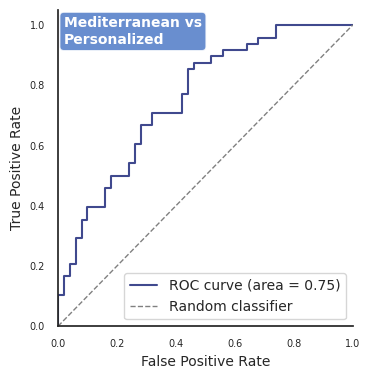

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Set the seaborn style for better aesthetics
sns.set_theme(style="white")

# Get ROC curve data
y_true = prediction_alloc_followup['true_values']
y_scores = prediction_alloc_followup['predictions']
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calculate AUC (assuming auc_score was previously calculated, otherwise uncomment this)
# auc_score = auc(fpr, tpr)

# Create a figure with improved styling
plt.figure(figsize=(4, 4))

# Create a custom color palette
palette = sns.color_palette("mako", 2)

# Plot the ROC curve with a thicker line and better color
plt.plot(fpr, tpr, linewidth=1.5, color=palette[0], 
         label='ROC curve (area = {:.2f})'.format(auc_score))

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1, 
         label='Random classifier')

# Set the limits and labels with improved fonts
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)

# # Add a descriptive title
# plt.title('Intervention Type Prediction', 
#           fontsize=7, fontweight='bold', pad=5)

# Improve the legend
plt.legend(loc='lower right', frameon=True, fontsize=10)

# Add grid for better readability
# plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
# Set smaller tick font sizes
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Remove upper and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Modern corner badge
plt.text(0.02, 0.98, 'Mediterranean vs\nPersonalized', transform=ax.transAxes, 
         fontsize=10, verticalalignment='top', horizontalalignment='left',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#4472C4', alpha=0.8), 
         color='white', weight='bold')
# Uncomment to save the figure
plt.savefig(os.path.join(DIET_PAPER_PATH, 'Figs_paper/BreakPoint_alloc_roc_curve.png'), dpi=300, bbox_inches='tight')
# save as pdf as well
plt.savefig(os.path.join(DIET_PAPER_PATH, 'Figs_paper/BreakPoint_alloc_roc_curve.pdf'), bbox_inches='tight')

# Show the plot
plt.show()

In [395]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def train_random_forest_with_cv(X_df, y_df, task='regression', n_folds=5, n_estimators=100, 
                               max_depth=None, random_state=42, verbose=True):
    """
    Train a Random Forest model with cross-validation given X and y dataframes.
    
    Parameters:
    -----------
    X_df : pandas DataFrame
        DataFrame containing the features/predictors
    y_df : pandas DataFrame
        DataFrame containing a single column with the target variable
    task : str, default='regression'
        Type of task, either 'regression' or 'classification'
    n_folds : int, default=5
        Number of folds for cross-validation
    n_estimators : int, default=100
        Number of trees in the random forest
    max_depth : int or None, default=None
        Maximum depth of the trees. If None, nodes are expanded until all leaves are pure
    random_state : int, default=42
        Random state for reproducibility
    verbose : bool, default=True
        Whether to print detailed results and plot feature importance
        
    Returns:
    --------
    dict : Dictionary containing model, scores, and average metrics
    """
    # Convert DataFrames to numpy arrays
    X = X_df.values
    y = y_df.values.ravel()  # Flatten y to 1D array
    
    # Initialize k-fold cross validation
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)
    
    # Initialize model based on task
    if task == 'regression':
        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=random_state
        )
        scoring = 'neg_mean_squared_error'
        
    elif task == 'classification':
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=random_state
        )
        scoring = 'roc_auc'
    else:
        raise ValueError("Task must be either 'regression' or 'classification'")
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring=scoring)
    
    # Train the final model on the entire dataset
    model.fit(X, y)
    
    # Store results in a dictionary
    results = {
        'model': model,
        'cv_scores': cv_scores,
        'feature_importance': model.feature_importances_,
        'feature_names': X_df.columns,
    }
    
    # Calculate and store metrics based on task type
    if task == 'regression':
        # For regression, convert neg_mean_squared_error back to MSE
        mse_scores = -cv_scores
        rmse_scores = np.sqrt(mse_scores)
        
        results['mse'] = mse_scores
        results['rmse'] = rmse_scores
        results['avg_mse'] = np.mean(mse_scores)
        results['avg_rmse'] = np.mean(rmse_scores)
        
        # Make predictions on the entire dataset for R² and MAE
        y_pred = model.predict(X)
        results['r2'] = r2_score(y, y_pred)
        results['mae'] = mean_absolute_error(y, y_pred)
        
        # Print results if verbose
        if verbose:
            print(f"Random Forest Regression Results ({n_folds}-fold CV):")
            print(f"MSE scores: {', '.join([f'{score:.4f}' for score in mse_scores])}")
            print(f"RMSE scores: {', '.join([f'{score:.4f}' for score in rmse_scores])}")
            print(f"Average MSE: {results['avg_mse']:.4f}")
            print(f"Average RMSE: {results['avg_rmse']:.4f}")
            print(f"R² score: {results['r2']:.4f}")
            print(f"Mean Absolute Error: {results['mae']:.4f}")
            
    else:  # Classification
        results['auc_scores'] = cv_scores
        results['avg_auc'] = np.mean(cv_scores)
        
        # Make predictions on the entire dataset for accuracy, precision, recall, and F1
        y_pred = model.predict(X)
        
        # For AUC, we need probability predictions
        y_pred_proba = model.predict_proba(X)
        
        # Calculate accuracy separately since we changed the CV scoring
        accuracy = accuracy_score(y, y_pred)
        results['accuracy'] = accuracy
        
        # Check if binary or multiclass
        if len(np.unique(y)) == 2:  # Binary classification
            results['precision'] = precision_score(y, y_pred)
            results['recall'] = recall_score(y, y_pred)
            results['f1'] = f1_score(y, y_pred)
            
            # Calculate AUC on the entire dataset
            results['auc'] = roc_auc_score(y, y_pred_proba[:, 1])  # Use proba of positive class
            
            if verbose:
                print(f"Random Forest Binary Classification Results ({n_folds}-fold CV):")
                print(f"AUC scores: {', '.join([f'{score:.4f}' for score in cv_scores])}")
                print(f"Average AUC: {results['avg_auc']:.4f}")
                print(f"AUC (entire dataset): {results['auc']:.4f}")
                print(f"Accuracy: {accuracy:.4f}")
                print(f"Precision: {results['precision']:.4f}")
                print(f"Recall: {results['recall']:.4f}")
                print(f"F1 Score: {results['f1']:.4f}")
                
        else:  # Multiclass classification
            results['precision'] = precision_score(y, y_pred, average='weighted')
            results['recall'] = recall_score(y, y_pred, average='weighted')
            results['f1'] = f1_score(y, y_pred, average='weighted')
            
            # Calculate AUC for multiclass - one-vs-rest approach
            results['auc'] = roc_auc_score(y, y_pred_proba, multi_class='ovr', average='weighted')
            
            if verbose:
                print(f"Random Forest Multiclass Classification Results ({n_folds}-fold CV):")
                print(f"AUC scores: {', '.join([f'{score:.4f}' for score in cv_scores])}")
                print(f"Average AUC: {results['avg_auc']:.4f}")
                print(f"AUC (entire dataset): {results['auc']:.4f}")
                print(f"Accuracy: {accuracy:.4f}")
                print(f"Weighted Precision: {results['precision']:.4f}")
                print(f"Weighted Recall: {results['recall']:.4f}")
                print(f"Weighted F1 Score: {results['f1']:.4f}")
    
    # Plot feature importance if verbose
    if verbose:
        plt.figure(figsize=(10, 6))
        
        # Sort features by importance
        indices = np.argsort(results['feature_importance'])
        
        plt.title('Feature Importance')
        plt.barh(range(len(indices)), results['feature_importance'][indices], align='center')
        plt.yticks(range(len(indices)), [results['feature_names'][i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.tight_layout()
        plt.show()
    
    return results

Random Forest Binary Classification Results (5-fold CV):
AUC scores: 0.6510, 0.6300, 0.5758, 0.4545, 0.5778
Average AUC: 0.5778
AUC (entire dataset): 1.0000
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


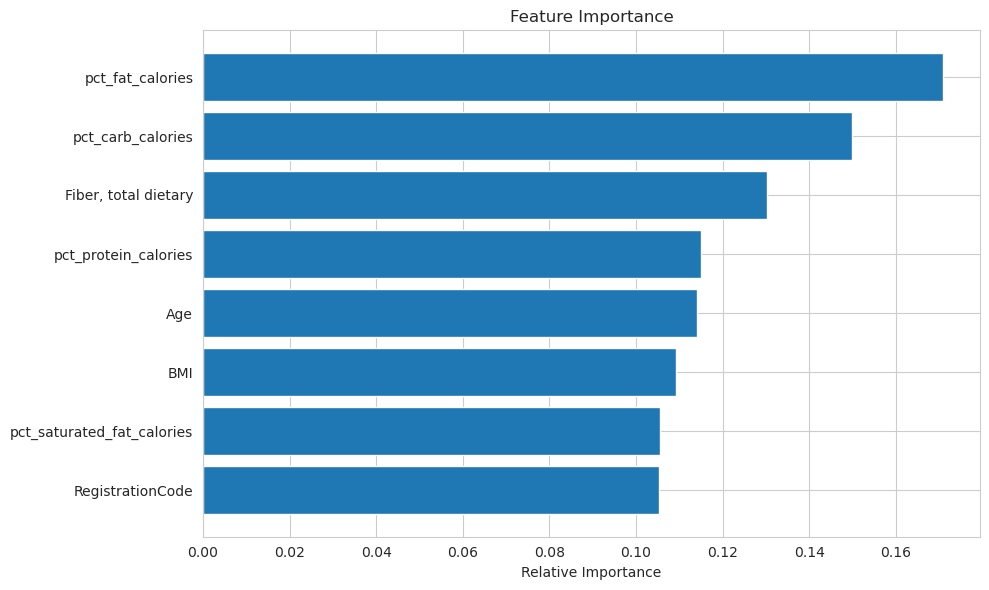

In [366]:
# Train Random Forest model with cross-validation
rf_results = train_random_forest_with_cv(
    X_df=predicted_macros_alloc_followup_x,
    y_df=predicted_macros_alloc_followup_y,
    task='classification',
    n_folds=5,
    n_estimators=1000,
    max_depth=None,
    random_state=42,
    verbose=True
)